# Product Purchase Trends of age groups Analysis for Regork

# Project Report by:
# Shehnaz Shake | Harshitha Kanuri | Duc Nguyen | Manasa Sharma

## Introduction

## Problem Statement
### To identify trends in product purchases by the age group that generates the highest revenue, leveraging data and statistical analysis techniques to gain insights into their purchasing behavior.

## Data

### We begin by merging transaction, product, demographics, and coupon data. Our goal is to identify the highest revenue-generating age group. Once identified, we analyze their preferred product categories to inform targeted marketing and product strategies.

## Approach/Analytic Technique

#### We will commence with data extraction, followed by sorting and employing various visualization techniques to delve into product purchasing behavior within specific age groups. Our aim is to pinpoint the highest revenue-generating product categories, thereby enhancing marketing return on investment for sustained business growth.

#### We excluded 'store_id,' 'basket_id,' 'retail_disc,' 'manufacturer_id,' 'coupon_disc,' and 'coupon_match_disc' from the column variables due to their excessive pooling and lack of relevance for our marketing campaign

### How to decide

#### Effective decision-making is inherently challenging. Our project aims to enhance the decision-making process by providing comprehensive insights, prioritizing key factors such as product category and age, to facilitate more targeted and informed marketing campaigns

### Transactions dataset

In [2]:
#!pip install completejourney-py  --- making it a comment , need it only once


## Packages Required

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Data Preparation

### Importing the dataset

#### Our data sets include the transactions, products, demographic,promotions and campaigns data sets included in the complete journey package. All of the data in complete journey shows retail shopping transactions for 2,469 households over the span of a year. We will read all of this data into Python.

In [72]:
from completejourney_py import get_data
transactions = get_data()["transactions"]

In [5]:
# checking the nature of transaction data table
transactions.head()

,household_id,store_id,basket_id,product_id,quantity,sales_value,retail_disc,coupon_disc,coupon_match_disc,week,transaction_timestamp
0,900,330,31198570044,1095275,1,0.50,0.00,0.0,0.0,1,2017-01-01 11:53:26
1,900,330,31198570047,9878513,1,0.99,0.10,0.0,0.0,1,2017-01-01 12:10:28
2,1228,406,31198655051,1041453,1,1.43,0.15,0.0,0.0,1,2017-01-01 12:26:30
3,906,319,31198705046,1020156,1,1.50,0.29,0.0,0.0,1,2017-01-01 12:30:27
4,906,319,31198705046,1053875,2,2.78,0.80,0.0,0.0,1,2017-01-01 12:30:27


In [6]:
# Number 
transactions.shape

(1469307, 11)

#### Data Cleaning

In [7]:
transactions.info() # No null data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1469307 entries, 0 to 1469306
Data columns (total 11 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   household_id           1469307 non-null  int64         
 1   store_id               1469307 non-null  int64         
 2   basket_id              1469307 non-null  int64         
 3   product_id             1469307 non-null  int64         
 4   quantity               1469307 non-null  int64         
 5   sales_value            1469307 non-null  float64       
 6   retail_disc            1469307 non-null  float64       
 7   coupon_disc            1469307 non-null  float64       
 8   coupon_match_disc      1469307 non-null  float64       
 9   week                   1469307 non-null  int64         
 10  transaction_timestamp  1469307 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(4), int64(6)
memory usage: 123.3 MB


# Products dataset

In [8]:
products = get_data()["products"]
products.head()

,product_id,manufacturer_id,department,brand,product_category,product_type,package_size
0,25671,2,GROCERY,National,FRZN ICE,ICE - CRUSHED/CUBED,22 LB
1,26081,2,MISCELLANEOUS,National,None,None,None
2,26093,69,PASTRY,Private,BREAD,BREAD:ITALIAN/FRENCH,None
3,26190,69,GROCERY,Private,FRUIT - SHELF STABLE,APPLE SAUCE,50 OZ
4,26355,69,GROCERY,Private,COOKIES/CONES,SPECIALTY COOKIES,14 OZ


In [9]:
products.info() # Last 3 columns have null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92331 entries, 0 to 92330
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   product_id        92331 non-null  int64 
 1   manufacturer_id   92331 non-null  int64 
 2   department        92331 non-null  object
 3   brand             92331 non-null  object
 4   product_category  91791 non-null  object
 5   product_type      91803 non-null  object
 6   package_size      61745 non-null  object
dtypes: int64(2), object(5)
memory usage: 4.9+ MB


# Demographics dataset

In [10]:
demographics = get_data()["demographics"]
demographics.head()

,household_id,age,income,home_ownership,marital_status,household_size,household_comp,kids_count
0,1,65+,35-49K,Homeowner,Married,2,2 Adults No Kids,0
1,1001,45-54,50-74K,Homeowner,Unmarried,1,1 Adult No Kids,0
2,1003,35-44,25-34K,None,Unmarried,1,1 Adult No Kids,0
3,1004,25-34,15-24K,None,Unmarried,1,1 Adult No Kids,0
4,101,45-54,Under 15K,Homeowner,Married,4,2 Adults Kids,2


In [11]:
demographics.info() # 2 columns with missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   household_id    801 non-null    int64 
 1   age             801 non-null    object
 2   income          801 non-null    object
 3   home_ownership  568 non-null    object
 4   marital_status  664 non-null    object
 5   household_size  801 non-null    object
 6   household_comp  801 non-null    object
 7   kids_count      801 non-null    object
dtypes: int64(1), object(7)
memory usage: 50.2+ KB


# Coupons dataset

In [12]:
coupons = get_data()["coupons"]
coupons.head()

,coupon_upc,product_id,campaign_id
0,10000085207,9676830,26
1,10000085207,9676943,26
2,10000085207,9676944,26
3,10000085207,9676947,26
4,10000085207,9677008,26


In [13]:
coupons.info() # No missing value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116204 entries, 0 to 116203
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype
---  ------       --------------   -----
 0   coupon_upc   116204 non-null  int64
 1   product_id   116204 non-null  int64
 2   campaign_id  116204 non-null  int64
dtypes: int64(3)
memory usage: 2.7 MB


## Transactions merge with products inner join

In [14]:
merge_data1 = pd.merge(transactions, products, on = 'product_id' , how = 'inner')
merge_data1.head()

,household_id,store_id,basket_id,product_id,quantity,sales_value,retail_disc,coupon_disc,coupon_match_disc,week,transaction_timestamp,manufacturer_id,department,brand,product_category,product_type,package_size
0,900,330,31198570044,1095275,1,0.50,0.00,0.0,0.0,1,2017-01-01 11:53:26,2,PASTRY,National,ROLLS,ROLLS: BAGELS,4 OZ
1,1276,380,31198977289,1095275,2,1.00,0.00,0.0,0.0,1,2017-01-01 22:23:53,2,PASTRY,National,ROLLS,ROLLS: BAGELS,4 OZ
2,762,31862,31225375060,1095275,1,0.50,0.00,0.0,0.0,2,2017-01-02 12:39:36,2,PASTRY,National,ROLLS,ROLLS: BAGELS,4 OZ
3,113,375,31225637831,1095275,4,2.00,0.00,0.0,0.0,2,2017-01-02 21:09:18,2,PASTRY,National,ROLLS,ROLLS: BAGELS,4 OZ
4,762,31862,31242385045,1095275,1,0.25,0.25,0.0,0.0,2,2017-01-03 12:21:27,2,PASTRY,National,ROLLS,ROLLS: BAGELS,4 OZ


## Merge_data1 inner join demographics

In [15]:
merge_data2 = pd.merge(merge_data1, demographics, on = 'household_id', how = 'inner')
merge_data2.head()

,household_id,store_id,basket_id,product_id,quantity,sales_value,retail_disc,coupon_disc,coupon_match_disc,week,...,product_category,product_type,package_size,age,income,home_ownership,marital_status,household_size,household_comp,kids_count
0,900,330,31198570044,1095275,1,0.50,0.00,0.0,0.0,1,...,ROLLS,ROLLS: BAGELS,4 OZ,35-44,35-49K,Homeowner,Married,2,2 Adults No Kids,0
1,900,330,31541475196,1095275,1,0.25,0.25,0.0,0.0,5,...,ROLLS,ROLLS: BAGELS,4 OZ,35-44,35-49K,Homeowner,Married,2,2 Adults No Kids,0
2,900,330,31672350129,1095275,1,0.25,0.25,0.0,0.0,5,...,ROLLS,ROLLS: BAGELS,4 OZ,35-44,35-49K,Homeowner,Married,2,2 Adults No Kids,0
3,900,330,31883555076,1095275,1,0.50,0.00,0.0,0.0,8,...,ROLLS,ROLLS: BAGELS,4 OZ,35-44,35-49K,Homeowner,Married,2,2 Adults No Kids,0
4,900,330,31944515097,1095275,1,0.50,0.00,0.0,0.0,8,...,ROLLS,ROLLS: BAGELS,4 OZ,35-44,35-49K,Homeowner,Married,2,2 Adults No Kids,0


## Merge_data2 inner join coupons data

In [16]:
final_merge_data = pd.merge(merge_data2, coupons, on = 'product_id', how = 'inner')
final_merge_data.head()

,household_id,store_id,basket_id,product_id,quantity,sales_value,retail_disc,coupon_disc,coupon_match_disc,week,...,package_size,age,income,home_ownership,marital_status,household_size,household_comp,kids_count,coupon_upc,campaign_id
0,900,330,31198570047,9878513,1,0.99,0.10,0.0,0.0,1,...,85 CT,35-44,35-49K,Homeowner,Married,2,2 Adults No Kids,0,10000089113,13
1,113,34011,34267391449,9878513,2,2.00,0.26,0.0,0.0,31,...,85 CT,35-44,125-149K,Homeowner,Married,4,2 Adults Kids,2,10000089113,13
2,113,34011,35726886813,9878513,1,1.00,0.13,0.0,0.0,37,...,85 CT,35-44,125-149K,Homeowner,Married,4,2 Adults Kids,2,10000089113,13
3,113,34011,40423665519,9878513,2,2.00,0.26,0.0,0.0,43,...,85 CT,35-44,125-149K,Homeowner,Married,4,2 Adults Kids,2,10000089113,13
4,113,34011,41310770643,9878513,3,3.39,0.00,0.0,0.0,52,...,85 CT,35-44,125-149K,Homeowner,Married,4,2 Adults Kids,2,10000089113,13


In [17]:
final_merge_data.shape

(1459445, 26)

In [79]:
final_merge_data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459445 entries, 0 to 1459444
Data columns (total 20 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   household_id           1459445 non-null  int64         
 1   product_id             1459445 non-null  int64         
 2   quantity               1459445 non-null  int64         
 3   sales_value            1459445 non-null  float64       
 4   week                   1459445 non-null  int64         
 5   transaction_timestamp  1459445 non-null  datetime64[ns]
 6   department             1459445 non-null  object        
 7   brand                  1459445 non-null  object        
 8   product_category       1457297 non-null  object        
 9   product_type           1458823 non-null  object        
 10  package_size           1220932 non-null  object        
 11  age                    1459445 non-null  object        
 12  income                 14594

## We need to remove unneccessary columns such as to help keep the data set smaller and easier to work with

In [19]:
final_merge_data = final_merge_data.drop(['store_id', 'basket_id', 'retail_disc',
                                         'manufacturer_id', 'coupon_disc', 'coupon_match_disc'], axis = 1)

In [20]:
final_merge_data.head()

,household_id,product_id,quantity,sales_value,week,transaction_timestamp,department,brand,product_category,product_type,package_size,age,income,home_ownership,marital_status,household_size,household_comp,kids_count,coupon_upc,campaign_id
0,900,9878513,1,0.99,1,2017-01-01 12:10:28,GROCERY,Private,FACIAL TISS/DNR NAPKIN,FACIAL TISSUE & PAPER HANDKE,85 CT,35-44,35-49K,Homeowner,Married,2,2 Adults No Kids,0,10000089113,13
1,113,9878513,2,2.00,31,2017-07-24 16:30:29,GROCERY,Private,FACIAL TISS/DNR NAPKIN,FACIAL TISSUE & PAPER HANDKE,85 CT,35-44,125-149K,Homeowner,Married,4,2 Adults Kids,2,10000089113,13
2,113,9878513,1,1.00,37,2017-09-06 19:15:07,GROCERY,Private,FACIAL TISS/DNR NAPKIN,FACIAL TISSUE & PAPER HANDKE,85 CT,35-44,125-149K,Homeowner,Married,4,2 Adults Kids,2,10000089113,13
3,113,9878513,2,2.00,43,2017-10-20 13:39:11,GROCERY,Private,FACIAL TISS/DNR NAPKIN,FACIAL TISSUE & PAPER HANDKE,85 CT,35-44,125-149K,Homeowner,Married,4,2 Adults Kids,2,10000089113,13
4,113,9878513,3,3.39,52,2017-12-19 14:31:25,GROCERY,Private,FACIAL TISS/DNR NAPKIN,FACIAL TISSUE & PAPER HANDKE,85 CT,35-44,125-149K,Homeowner,Married,4,2 Adults Kids,2,10000089113,13


In [21]:
final_merge_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459445 entries, 0 to 1459444
Data columns (total 20 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   household_id           1459445 non-null  int64         
 1   product_id             1459445 non-null  int64         
 2   quantity               1459445 non-null  int64         
 3   sales_value            1459445 non-null  float64       
 4   week                   1459445 non-null  int64         
 5   transaction_timestamp  1459445 non-null  datetime64[ns]
 6   department             1459445 non-null  object        
 7   brand                  1459445 non-null  object        
 8   product_category       1457297 non-null  object        
 9   product_type           1458823 non-null  object        
 10  package_size           1220932 non-null  object        
 11  age                    1459445 non-null  object        
 12  income                 14594

## Exploratory Data Analysis

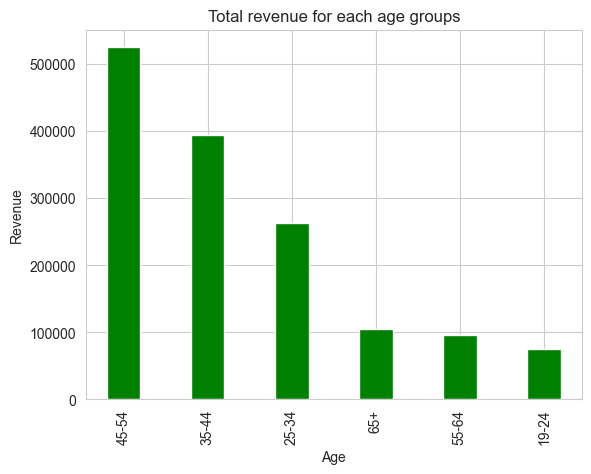

In [81]:
# Find which age group has the most sales revenue
final_merge_data.groupby('age')['sales_value'].sum().sort_values(ascending = False)
final_merge_data['age'].value_counts().plot(kind='bar' , color='green' , width = 0.4 , fill='steelblue')
plt.xlabel("Age")
plt.ylabel("Revenue")
plt.title("Total revenue for each age groups")
plt.show()

demographic - age: 45-54 because they generate the most revenue.

group by age, then by product_category and sub category product_type, then sum sales_values, sort descending

# As seen from the above bar graph, age groups 45-54 generate the most revenue.

In [27]:
# filter out the age 45-54
filtered_age_df = final_merge_data[(final_merge_data['age'] == '45-54')]


In [74]:
#filtered_age_df['revenue'] = filtered_age_df['quantity']*filtered_age_df['sales_value']
filtered_age_df.loc[:, 'revenue'] = pd.to_numeric(filtered_age_df['quantity'] * filtered_age_df['sales_value'])
filtered_age_df

,household_id,product_id,quantity,sales_value,week,transaction_timestamp,department,brand,product_category,product_type,...,age,income,home_ownership,marital_status,household_size,household_comp,kids_count,coupon_upc,campaign_id,revenue
16,1823,9878513,1,1.29,23,2017-06-01 19:43:45,GROCERY,Private,FACIAL TISS/DNR NAPKIN,FACIAL TISSUE & PAPER HANDKE,...,45-54,75-99K,Homeowner,Married,2,2 Adults No Kids,0,10000089113,13,1.29
17,1823,9878513,1,1.03,39,2017-09-23 21:37:01,GROCERY,Private,FACIAL TISS/DNR NAPKIN,FACIAL TISSUE & PAPER HANDKE,...,45-54,75-99K,Homeowner,Married,2,2 Adults No Kids,0,10000089113,13,1.03
18,1823,9878513,1,1.03,49,2017-11-30 00:34:22,GROCERY,Private,FACIAL TISS/DNR NAPKIN,FACIAL TISSUE & PAPER HANDKE,...,45-54,75-99K,Homeowner,Married,2,2 Adults No Kids,0,10000089113,13,1.03
20,1633,9878513,1,1.09,8,2017-02-19 22:42:13,GROCERY,Private,FACIAL TISS/DNR NAPKIN,FACIAL TISSUE & PAPER HANDKE,...,45-54,50-74K,Homeowner,Married,2,2 Adults No Kids,0,10000089113,13,1.09
21,1633,9878513,2,2.00,10,2017-03-05 21:45:25,GROCERY,Private,FACIAL TISS/DNR NAPKIN,FACIAL TISSUE & PAPER HANDKE,...,45-54,50-74K,Homeowner,Married,2,2 Adults No Kids,0,10000089113,13,4.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1459440,2364,1981828,1,0.99,53,2017-12-27 23:10:24,GROCERY,Private,FLUID MILK PRODUCTS,MISCELLANEOUS MILK,...,45-54,25-34K,Renter,Married,2,2 Adults No Kids,0,10000085476,18,0.99
1459441,2364,1982306,1,0.80,53,2017-12-27 23:10:24,GROCERY,Private,FRUIT - SHELF STABLE,FRUIT COCKTAIL FRUIT SALAD,...,45-54,25-34K,Renter,Married,2,2 Adults No Kids,0,10000089259,18,0.80
1459442,2364,1989572,1,3.99,53,2017-12-27 23:10:24,MEAT-PCKGD,National,DINNER SAUSAGE,SMOKED/COOKED,...,45-54,25-34K,Renter,Married,2,2 Adults No Kids,0,10000085363,8,3.99
1459443,2364,1989572,1,3.99,53,2017-12-27 23:10:24,MEAT-PCKGD,National,DINNER SAUSAGE,SMOKED/COOKED,...,45-54,25-34K,Renter,Married,2,2 Adults No Kids,0,10000085429,13,3.99


#### From the filtered age data frame we are grouping the product category by the revenue generated to find out which products generated the most revenue

In [103]:
grouped_data = filtered_age_df.groupby(['product_category'])['revenue'].sum().sort_values(ascending = False)

grouped_data

product_category
BEEF                      174659.83
FLUID MILK PRODUCTS       170062.18
FRZN MEAT/MEAT DINNERS    115113.23
FROZEN PIZZA               97440.01
CHEESE                     92631.70
                            ...    
TOYS AND GAMES                 6.99
NATURAL HBC                    6.98
CONTINUITIES                   6.98
PROD SUPPLIES                  5.98
APPAREL                        5.58
Name: revenue, Length: 243, dtype: float64

### We can notice that BEEF, FLUID MILK PRODUCTS and FROZEN MEET generated the most revenue by the people belonging to 45-54 age group

# Which top products have a positive trend in revenues over a time period?

In [50]:
#building a new dataframe with revelant column for the business problem
grouped_final=filtered_age_df[['household_id','transaction_timestamp','income','product_category','revenue']]

In [51]:
grouped_final

,household_id,transaction_timestamp,income,product_category,revenue
16,1823,2017-06-01 19:43:45,75-99K,FACIAL TISS/DNR NAPKIN,1.29
17,1823,2017-09-23 21:37:01,75-99K,FACIAL TISS/DNR NAPKIN,1.03
18,1823,2017-11-30 00:34:22,75-99K,FACIAL TISS/DNR NAPKIN,1.03
20,1633,2017-02-19 22:42:13,50-74K,FACIAL TISS/DNR NAPKIN,1.09
21,1633,2017-03-05 21:45:25,50-74K,FACIAL TISS/DNR NAPKIN,4.00
...,...,...,...,...,...
1459440,2364,2017-12-27 23:10:24,25-34K,FLUID MILK PRODUCTS,0.99
1459441,2364,2017-12-27 23:10:24,25-34K,FRUIT - SHELF STABLE,0.80
1459442,2364,2017-12-27 23:10:24,25-34K,DINNER SAUSAGE,3.99
1459443,2364,2017-12-27 23:10:24,25-34K,DINNER SAUSAGE,3.99


### Plotting the top 3 product categories that generated the most revenue over the months

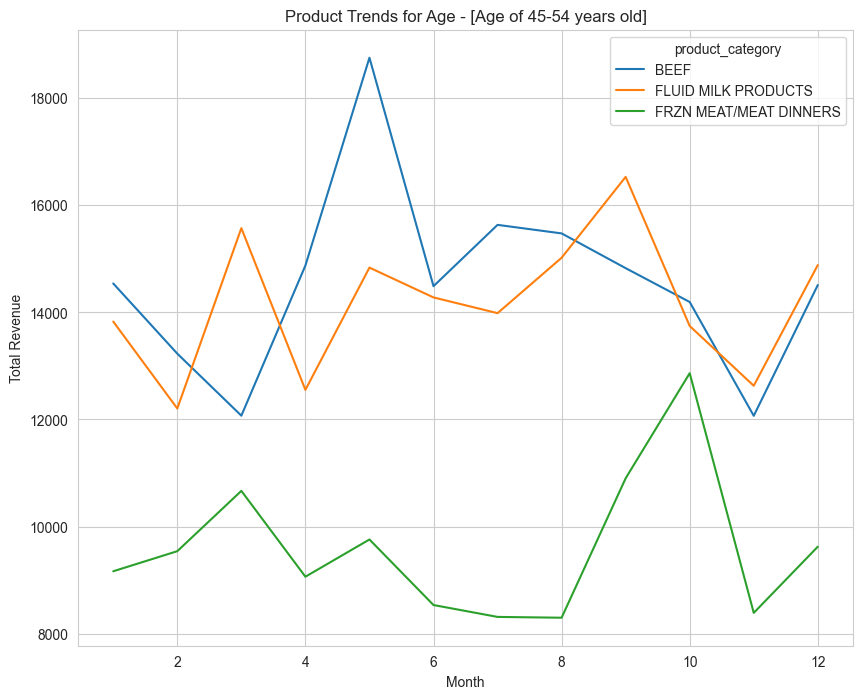

In [75]:
grouped_final['which_month'] = grouped_final['transaction_timestamp'].dt.month_name().str[:3]

grouped_final_1 = grouped_final.loc[(grouped_final['product_category'] == 'BEEF') | (grouped_final['product_category'] == 'FLUID MILK PRODUCTS') | 
 (grouped_final['product_category'] == 'FRZN MEAT/MEAT DINNERS')].groupby(['which_month','product_category'], as_index=False).agg({"revenue" :"sum"}).sort_values(by=['revenue'], ascending=False)
grouped_final_1
value_mapping = {'Jan': 1,'Feb': 2,'Mar': 3,'Apr': 4,'May': 5,'Jun': 6,'Jul': 7,'Aug': 8,'Sep': 9,'Oct': 10,'Nov': 11,'Dec': 12}
grouped_final_1['which_month']=grouped_final_1['which_month'].replace(value_mapping)

fig, ax = plt.subplots(figsize=(10, 8))
sns.lineplot(data=grouped_final_1, x="which_month", y="revenue",hue='product_category',ax=ax)
plt.xlabel("Month")
plt.ylabel("Total Revenue")
plt.title("Product Trends for Age - [Age of 45-54 years old]")
plt.show()

### Certain observations have been noted:

### BEEF sales exhibit growth from March to May, followed by a sharp decline in June. A minor resurgence occurs in November.
### FLUID MILK PRODUCTS sales display fluctuation, with the lowest recorded in February.
### FROZEN MEAT sales show a positive trend until March, with a dip in April. Sales peak in October but decline sharply in November

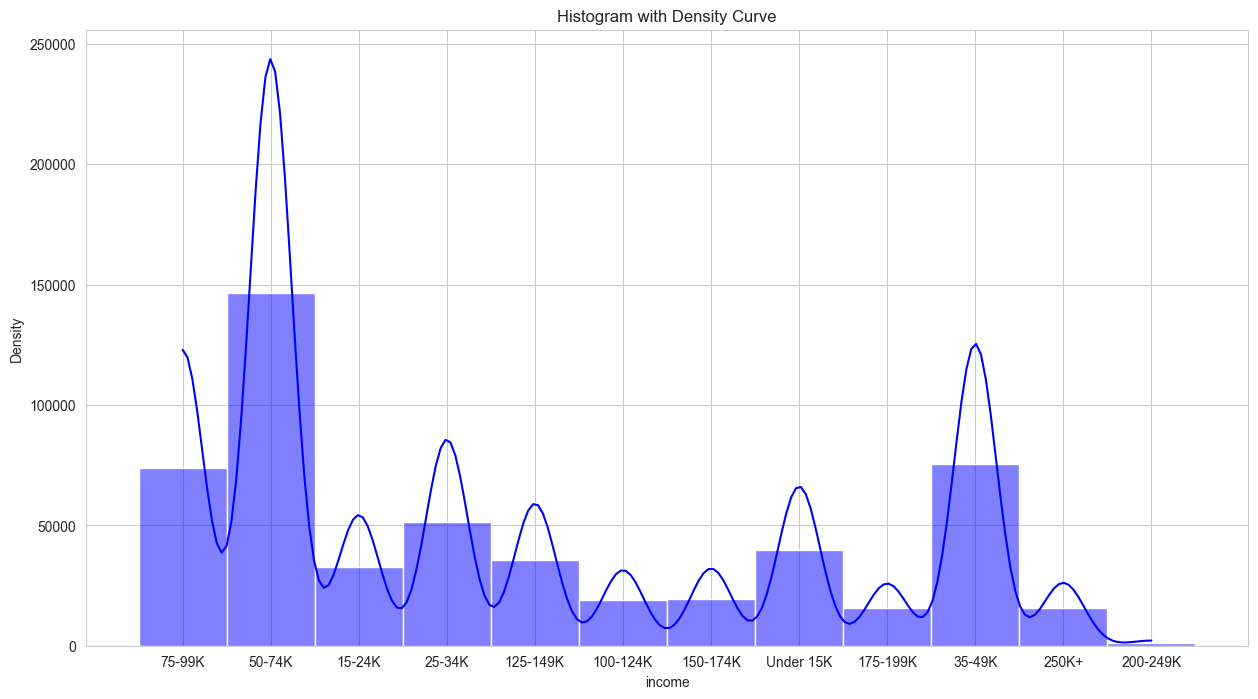

In [63]:
income_df= pd.DataFrame(grouped_final)

# Set the style of the plot
sns.set_style("whitegrid")

plt.figure(figsize=(15,8))
# Create a histogram with a density curve using Seaborn
sns.histplot(data=income_df, x='income', kde=True, color='blue', bins=30)

# Add labels and a title

plt.xlabel('income')
plt.ylabel('Density')
plt.title('Histogram with Density Curve')

# Show the plot
plt.show()

### We can see that the income group of 50-74k generate the most revenue and moving forward, we check which product categories they purchased the most

In [66]:
income_group_data = grouped_final[(grouped_final['income'] == '50-74K')]
income_group_data

,household_id,transaction_timestamp,income,product_category,revenue,which_month
20,1633,2017-02-19 22:42:13,50-74K,FACIAL TISS/DNR NAPKIN,1.09,Feb
21,1633,2017-03-05 21:45:25,50-74K,FACIAL TISS/DNR NAPKIN,4.00,Mar
22,1633,2017-04-10 00:53:38,50-74K,FACIAL TISS/DNR NAPKIN,1.00,Apr
23,1633,2017-04-16 14:54:13,50-74K,FACIAL TISS/DNR NAPKIN,1.00,Apr
24,1633,2017-05-21 23:31:13,50-74K,FACIAL TISS/DNR NAPKIN,1.29,May
...,...,...,...,...,...,...
1456530,16,2017-05-31 19:05:48,50-74K,CHEESE,2.50,May
1456531,16,2017-05-31 19:05:48,50-74K,CHEESE,2.50,May
1456532,16,2017-05-31 19:05:48,50-74K,CHEESE,2.50,May
1456533,16,2017-05-31 19:05:48,50-74K,CHEESE,2.50,May


In [68]:
grouped_income = income_group_data.groupby(['product_category'])['revenue'].sum()

grouped_income.sort_values(ascending = False, inplace = True)

grouped_income.head(20)

product_category
FLUID MILK PRODUCTS               43772.34
BEEF                              42913.44
FROZEN PIZZA                      33305.40
FRZN MEAT/MEAT DINNERS            31887.63
CHEESE                            23843.58
REFRGRATD JUICES/DRNKS            18627.41
ICE CREAM/MILK/SHERBTS            14916.61
CHICKEN                           14905.52
YOGURT                            14384.04
PORK                              13195.70
FRZN VEGETABLE/VEG DSH            12587.80
LUNCHMEAT                         12014.51
WATER - CARBONATED/FLVRD DRINK    11380.74
COLD CEREAL                       10506.77
SEAFOOD - FROZEN                   9102.80
BACON                              8779.71
REFRGRATD DOUGH PRODUCTS           8550.46
BREAKFAST SAUSAGE/SANDWICHES       7781.84
INFANT FORMULA                     7748.10
MEAT - MISC                        7699.17
Name: revenue, dtype: float64

### Plotting the top 3 product categories that generated most revenue to check the trends over the year.

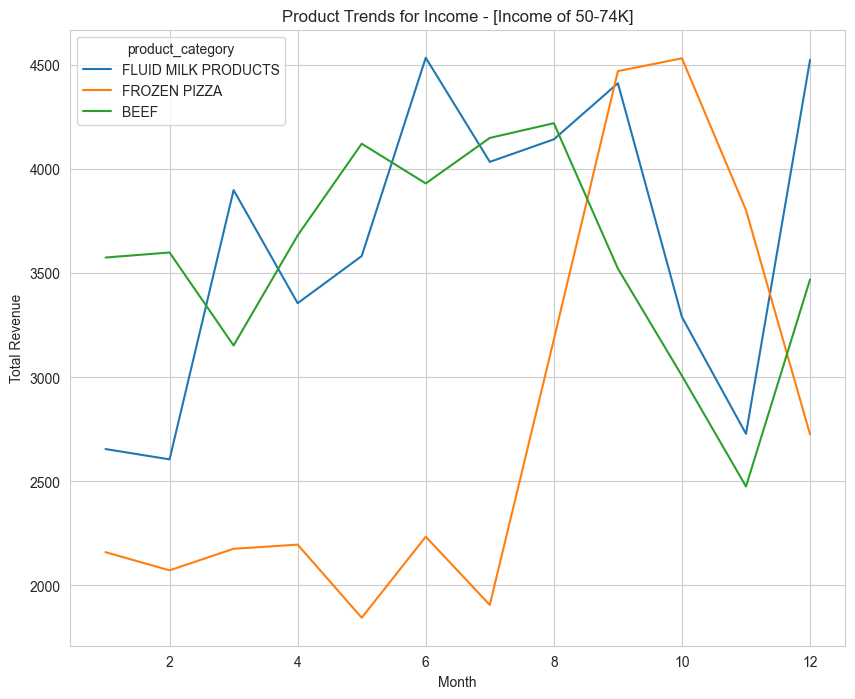

In [76]:
income_group_data['which_month'] = income_group_data['transaction_timestamp'].dt.month_name().str[:3]

income_filtered_1 = income_group_data.loc[(income_group_data['product_category'] == 'BEEF') | (income_group_data['product_category'] == 'FROZEN PIZZA') | 
 (income_group_data['product_category'] == 'FLUID MILK PRODUCTS')].groupby(['which_month','product_category'], as_index=False).agg({"revenue" :"sum"}).sort_values(by=['revenue'], ascending=False)
income_filtered_1
value_mapping = {'Jan': 1,'Feb': 2,'Mar': 3,'Apr': 4,'May': 5,'Jun': 6,'Jul': 7,'Aug': 8,'Sep': 9,'Oct': 10,'Nov': 11,'Dec': 12}
income_filtered_1['which_month']=income_filtered_1['which_month'].replace(value_mapping)
fig, ax = plt.subplots(figsize=(10, 8))

sns.lineplot(data=income_filtered_1, x="which_month", y="revenue",hue='product_category', ax=ax)
plt.xlabel("Month")
plt.ylabel("Total Revenue")
plt.title("Product Trends for Income - [Income of 50-74K]")

plt.show()


### Observations : 
### FLUID MILK PRODUCTS : The sales take a deep dive in the month of september and then proceed to show a sharp increase in the month of november.
### FROZEN PIZZA : The sales for frozen pizza depict a fluctuating pattern till the month of june, from june the sales skyrockted till the month of October and then again proceed to decrease from October.
### BEEF: The sales for beef also show an fluctuiating pattern till august, the sales show a sharp decline from august to november.

# Summary

#### "Based on our analysis, we recommend the following targeted marketing campaigns:

#### 1. Age Group 45-54:
####   - Aggressive Beef campaign from March to May.
####   - Less aggressive Fluid Milk campaign from May to August.

#### 2. Income Range 50-74k:
####   - Aggressive Frozen Pizza campaign from July to September.
####   - Less aggressive Beef campaign from September to November.

#### Key Insights:
#### - A negative trend in Beef purchases for the age group 45-54 between May and November.
#### - Peak Beef sales in March to May for the age group 45-54, followed by a sharp decline.
#### - Highest sales volume for Fluid Milk and Frozen Pizza in the 50-74k income range, generating revenue above 4500.

#### For further optimization, consider researching specific products within each category to refine targeting and enhance advertising effectiveness."